# Autoencoder with 'normal' PyTorch proceduer

ref: https://medium.com/pytorch/implementing-an-autoencoder-in-pytorch-19baa22647d1, https://www.kaggle.com/jagadeeshkotra/autoencoders-with-pytorch

In [1]:
%cd ..

/src


In [2]:
import torch
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%matplotlib inline

In [3]:
import torch.nn as nn
import torchvision
from torch import optim

In [4]:
from src.models.autoencoder import AutoEncoder, AE

## get dataset and dataloader

In [5]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [6]:
train_dataset[0][0].shape
n_features = 784

In [7]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu

# model = AE(input_shape=n_features).to(device)
model =AutoEncoder(n_features=n_features, hidden_size=5, seed=1, gpu='0').to(device)
print(model)

AutoEncoder(
  (encoder): Encoder(
    (_encode): Sequential(
      (0): Linear(in_features=784, out_features=512, bias=True)
      (1): Tanh()
      (2): Linear(in_features=512, out_features=256, bias=True)
      (3): Tanh()
      (4): Linear(in_features=256, out_features=128, bias=True)
      (5): Tanh()
      (6): Linear(in_features=128, out_features=64, bias=True)
      (7): Tanh()
      (8): Linear(in_features=64, out_features=32, bias=True)
      (9): Tanh()
      (10): Linear(in_features=32, out_features=16, bias=True)
      (11): Tanh()
      (12): Linear(in_features=16, out_features=5, bias=True)
    )
  )
  (decoder): Decoder(
    (_decode): Sequential(
      (0): Linear(in_features=5, out_features=16, bias=True)
      (1): Tanh()
      (2): Linear(in_features=16, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=64, bias=True)
      (5): Tanh()
      (6): Linear(in_features=64, out_features=128, bias=True)
      (7): Tanh()
      (8

In [9]:
from torchsummary import summary
summary(model, input_size=(1, n_features))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]         401,920
              Tanh-2               [-1, 1, 512]               0
            Linear-3               [-1, 1, 256]         131,328
              Tanh-4               [-1, 1, 256]               0
            Linear-5               [-1, 1, 128]          32,896
              Tanh-6               [-1, 1, 128]               0
            Linear-7                [-1, 1, 64]           8,256
              Tanh-8                [-1, 1, 64]               0
            Linear-9                [-1, 1, 32]           2,080
             Tanh-10                [-1, 1, 32]               0
           Linear-11                [-1, 1, 16]             528
             Tanh-12                [-1, 1, 16]               0
           Linear-13                 [-1, 1, 5]              85
          Encoder-14                 [-

In [10]:
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
criterion = nn.MSELoss()

In [11]:
epochs = 10

for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/10, loss = 25.759428
epoch : 2/10, loss = 21.816825
epoch : 3/10, loss = 20.488939
epoch : 4/10, loss = 19.916232
epoch : 5/10, loss = 19.019100
epoch : 6/10, loss = 18.197686
epoch : 7/10, loss = 17.442150
epoch : 8/10, loss = 16.816875
epoch : 9/10, loss = 16.404193
epoch : 10/10, loss = 16.094363


In [12]:
outputs.shape

torch.Size([96, 784])

In [13]:
model.eval()
predictions = []

for batch_idx, (batch_features, _) in enumerate(test_loader):
        
        batch_features = batch_features.view(-1, 784).to(device)

        pred = model(batch_features)
        
        for prediction in pred:
            predictions.append(prediction)
            
        
len(predictions)   

10000

In [14]:
def show_torch_image(torch_tensor):
    plt.imshow(torch_tensor.cpu().numpy().reshape(28, 28), cmap='gray')
    plt.show()

In [15]:
i=12

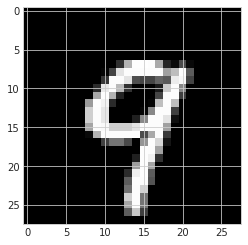

In [16]:
show_torch_image(test_dataset[i][0].detach())

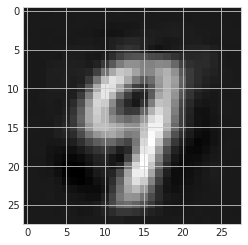

In [17]:
show_torch_image(predictions[i].detach())